In [2]:
import seaborn as sns  # Seaborn for data visualization
import pandas as pd  # Pandas for data manipulation and analysis
import numpy as np  # NumPy for numerical computations
import matplotlib.pyplot as plt

# Imputation techniques from Scikit-learn
from sklearn.impute import KNNImputer  # KNN Imputer for filling missing values using K-Nearest Neighbors
from sklearn.ensemble import RandomForestRegressor  # Random Forest for machine learning-based imputation
from sklearn.model_selection import train_test_split  # Splitting data into training and testing sets

 # Layers module for defining neural network architecture

# Label Encoding from Scikit-learn
from sklearn.preprocessing import LabelEncoder

# Read the dataset into a pandas dataframe
read_df = pd.read_csv('pwt1001.csv')

#Get specific data from 2000-2018
df = read_df[(read_df["year"] >= 2000) & (read_df["year"] <= 2018)]
df_selected = df[["country", "year", "rgdpo", "pop"]].dropna()

In [3]:
# Display the first few rows of the dataframe to confirm the data has been loaded correctly
print(df_selected.head())

   country  year   rgdpo  pop
50   Aruba  2000  4130.0  0.0
51   Aruba  2001  4728.0  0.0
52   Aruba  2002  3555.0  0.0
53   Aruba  2003  3702.0  0.0
54   Aruba  2004  4228.0  0.0


In [4]:
# Check missing values
print(df_selected.isnull().sum())

country    0
year       0
rgdpo      0
pop        0
dtype: int64


In [5]:
# Calculate gross domestic product per capita
df_selected = df_selected[df_selected["pop"] > 0]  # Remove rows where population is zero
df_selected["gdp_per_capita"] = df_selected["rgdpo"] / df_selected["pop"] # Create new gdp column
print(df_selected[["gdp_per_capita"]].describe())

       gdp_per_capita
count     2987.000000
mean     17709.493130
std      20757.080828
min        376.275862
25%       3480.750000
50%       9860.428571
75%      25303.906699
max     232053.000000


/var/folders/h8/d_npq8td7xb5j2cv4g8nq9ch0000gn/T/ipykernel_3476/2033972758.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected["gdp_per_capita"] = df_selected["rgdpo"] / df_selected["pop"] # Create new gdp column


In [6]:
# Calculate mean, median, mode, and quantiles

# Overall economic performance and standard of living of a country or region
mean_gdp = df_selected["gdp_per_capita"].mean()
median_gdp = df_selected["gdp_per_capita"].median()
# The most common economic condition among countries (detect clusters later)
mode_gdp = df_selected["gdp_per_capita"].mode().values
# Divide the GDP per capita data into intervals (determine income levels later)
quantiles_gdp = df_selected["gdp_per_capita"].quantile([0.25, 0.5, 0.75, 1.0])

# GDP statistics
print("\nDescriptive Statistics for GDP per Capita (2000-2018):")
print(f"Mean GDP per Capita: {mean_gdp}")
print(f"Median GDP per Capita: {median_gdp}")
print(f"Mode GDP per Capita: {mode_gdp}")
print("Quantiles of GDP per Capita:")
print(quantiles_gdp)



Descriptive Statistics for GDP per Capita (2000-2018):
Mean GDP per Capita: 17709.49312963972
Median GDP per Capita: 9860.42857142857
Mode GDP per Capita: [2213. 6102.]
Quantiles of GDP per Capita:
0.25      3480.750000
0.50      9860.428571
0.75     25303.906699
1.00    232053.000000
Name: gdp_per_capita, dtype: float64


In [8]:
# High mean = higher standard of living
countries = ["United States", "Germany", "China", "India"]
df_filtered = df_selected[df_selected["country"].isin(countries)]
mean_gdp_by_country = df_filtered.groupby("country")["gdp_per_capita"].mean()

# examples
print("\nMean GDP per Capita by Country (2000-2018):")
print(mean_gdp_by_country)


Mean GDP per Capita by Country (2000-2018):
country
China             9167.553539
Germany          44525.402015
India             4158.292134
United States    54865.084563
Name: gdp_per_capita, dtype: float64


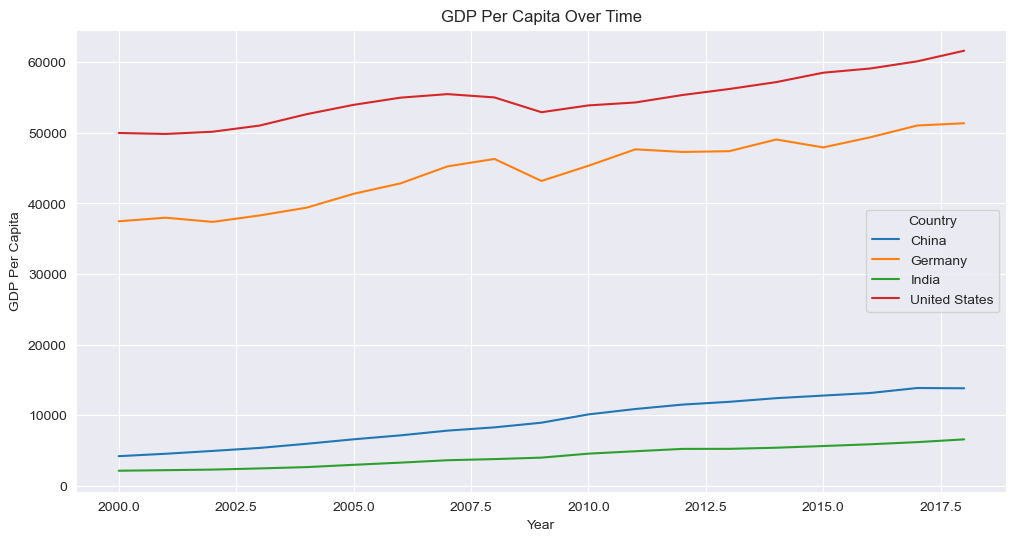

In [10]:
# visualising gdp per capita
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_filtered, x="year", y="gdp_per_capita", hue="country")
plt.title("GDP Per Capita Over Time")
plt.xlabel("Year")
plt.ylabel("GDP Per Capita")
plt.legend(title="Country")
plt.grid(True)
plt.show()
